<a href="https://colab.research.google.com/github/VenkataraoGaddam/DMS_Project/blob/main/Yolo11n_Custom_Ideal_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

# Load the custom model
model = YOLO("/content/drive/MyDrive/yolo11n_custom.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

model.info()
print(model)

100%|██████████| 5.35M/5.35M [00:00<00:00, 115MB/s]

Transferred 297/593 items from pretrained weights


YOLO11n_custom summary: 216 layers, 2,740,032 parameters, 2,740,016 gradients, 11.4 GFLOPs
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=F

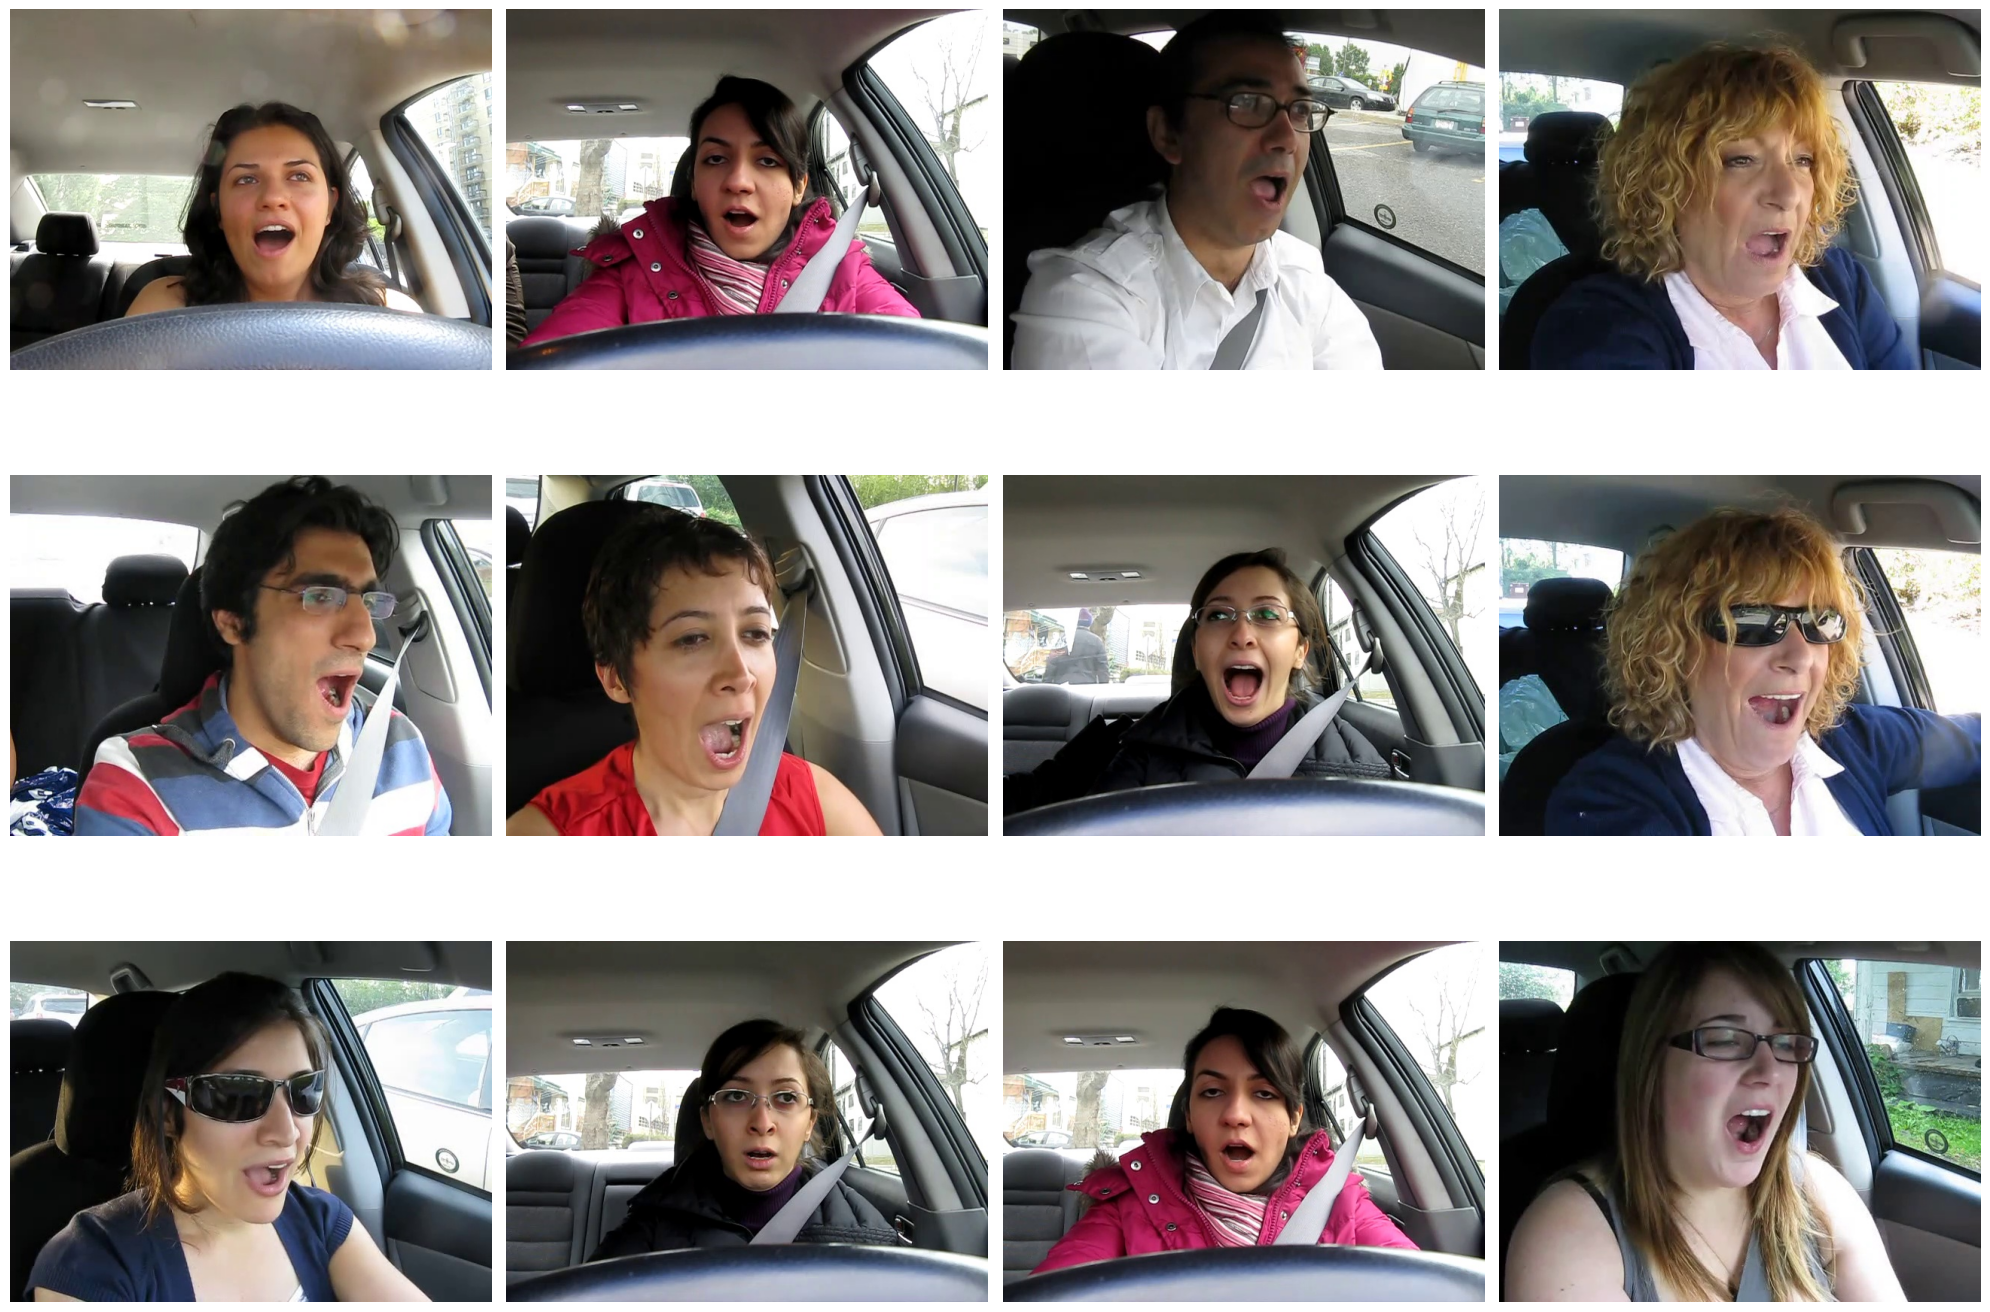

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

image_path = glob.glob('/content/drive/MyDrive/DMS_Project/Datasets/Ideal/train/images/*.jpg')[24:36]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Iterate over the image paths and display each image in a subplot
for i, path in enumerate(image_path):
  row = i // 4
  col = i % 4

  # Open the image using PIL
  img = Image.open(path)

  # Display the image in the current subplot
  axes[row, col].imshow(img)
  axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Train the model with Drowsiness Dataset
results = model.train(data="/content/drive/MyDrive/DMS_Project/Datasets/Ideal/data.yaml", epochs=100, imgsz=640, plots=True)

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo11n_custom.yaml, data=/content/drive/MyDrive/DMS_Project/Datasets/Ideal/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]


Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/DMS_Project/Datasets/Ideal/train/labels.cache... 19053 images, 163 backgrounds, 3 corrupt: 100%|██████████| 19107/19107 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/DMS_Project/Datasets/Ideal/train/images/gA_1_s2_ir_face_mp4-408_jpg.rf.40e3c7917dc97812a333f0b125537bb0.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/DMS_Project/Datasets/Ideal/train/images/gA_1_s2_ir_face_mp4-408_jpg.rf.40e3c7917dc97812a333f0b125537bb0.jpg'
train: WARNING ⚠️ /content/drive/MyDrive/DMS_Project/Datasets/Ideal/train/images/gA_5_s2_ir_face_mp4-311_jpg.rf.199cec2d223703a7238fb4b82b760fd0.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/DMS_Project/Datasets/Ideal/train/images/gA_5_s2_ir_face_mp4-311_jpg.rf.199cec2d223703a7238fb4b82b760fd0.jpg'
train: WARNING ⚠️ /content/drive/MyDrive/DMS_Project/Datasets/Ideal/train/images/gB_10_s2_2019-03-11T15-15-21-01-00_ir_face_mp4-796_jpg.rf.6bb80a6354996eeabaa12382a19b270c.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/DMS_Project/Datasets/Ideal/train/images/gB_10_s2_2019-03-11T15

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 331, len(boxes) = 28296. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/DMS_Project/Datasets/Ideal/val/labels.cache... 4442 images, 48 backgrounds, 0 corrupt: 100%|██████████| 4463/4463 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 96 weight(decay=0.0), 105 weight(decay=0.0005), 104 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.75G      1.933      3.487      2.874         62        640: 100%|██████████| 1194/1194 [1:18:27<00:00,  3.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [01:08<00:00,  2.04it/s]


                   all       4463       7910      0.544      0.305      0.225      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       4.4G      1.068      2.073      1.652         65        640: 100%|██████████| 1194/1194 [07:52<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 140/140 [00:52<00:00,  2.69it/s]


                   all       4463       7910      0.596      0.532      0.441      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       4.4G     0.9512      1.809      1.508         45        640:  25%|██▍       | 293/1194 [01:53<05:25,  2.77it/s]

In [ ]:
from IPython.display import display, Image
from IPython import display
display.clear_output()

Image(filename = f'/content/runs/detect/train/confusion_matrix.png', height = 600)

In [ ]:
Image(filename = f'/content/runs/detect/train/results.png', width=1000)

In [ ]:
Image(filename = f'/content/runs/detect/train/PR_curve.png', width=900)

In [ ]:
# Validate the model
# evaluate model performance on the validation set
# Load Custom YOLO11 Model
custom_yolo = '/content/runs/detect/train/weights/best.pt'
model = YOLO(custom_yolo)
results = model.val(data="/content/drive/MyDrive/DMS_Project/Datasets/Ideal/data.yaml", plots=True, save_json=True)  # evaluate model performance on the validation set

In [ ]:
# Load Custom YOLO11 Model
from matplotlib import pyplot as plt

custom_yolo = '/content/runs/detect/train/weights/best.pt'
model = YOLO(custom_yolo)
results = model.predict(source="/content/drive/MyDrive/DMS_Project/Datasets/Ideal/test/images", conf=0.5, save_txt=True, save_conf=True, show=True)

# Iterate through the list of Results objects using their index
for i in range(len(results)):
  # Access the Results object using its index
  show_img = results[i].plot()
  plt.imshow(show_img)
  plt.show()

# Save the model
model.save("custom_yolo11n_ideal.pt")

In [ ]:
model.export(format="onnx")